# Inspect the single-lineage model run on the prostate data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from time import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from speclet.io import models_dir
from speclet.plot import set_speclet_theme

In [4]:
# Notebook execution timer.
notebook_tic = time()

# Plotting setup.
set_speclet_theme()
%config InlineBackend.figure_format = "retina"

## Data

### Load posterior summary

In [5]:
prostate_post_summary = pd.read_csv(
    models_dir() / "hnb-single-lineage-prostate_PYMC_NUMPYRO" / "posterior-summary.csv"
).assign(var_name=lambda d: [x.split("[")[0] for x in d["parameter"]])
prostate_post_summary.head()

,parameter,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,var_name
0,z,0.238,0.479,-0.255,1.348,0.190,0.141,6.0,13.0,1.91,z
1,mu_f,-0.139,0.172,-0.438,-0.027,0.085,0.065,5.0,18.0,3.13,mu_f
2,mu_k,-0.095,0.024,-0.126,-0.070,0.012,0.009,4.0,11.0,3.32,mu_k
3,sigma_a,0.795,0.664,0.082,1.789,0.203,0.148,9.0,42.0,1.62,sigma_a
4,alpha,6.379,2.018,3.486,8.428,1.005,0.770,4.0,11.0,3.73,alpha


## Analysis

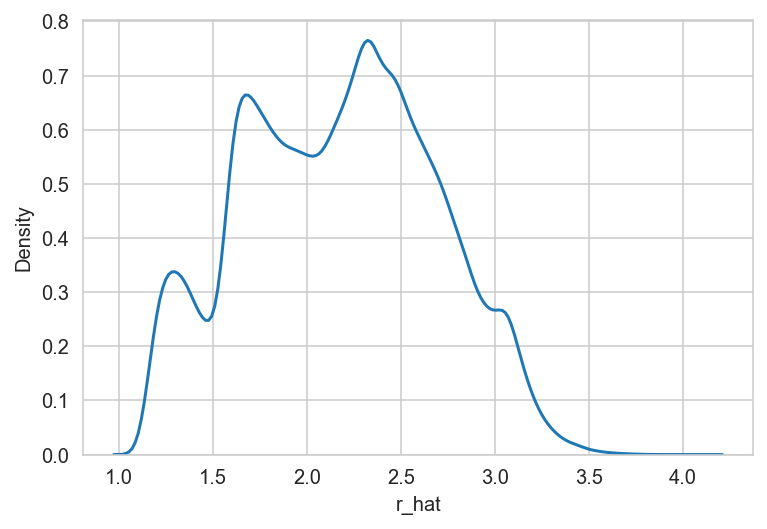

In [6]:
sns.kdeplot(x=prostate_post_summary["r_hat"]);

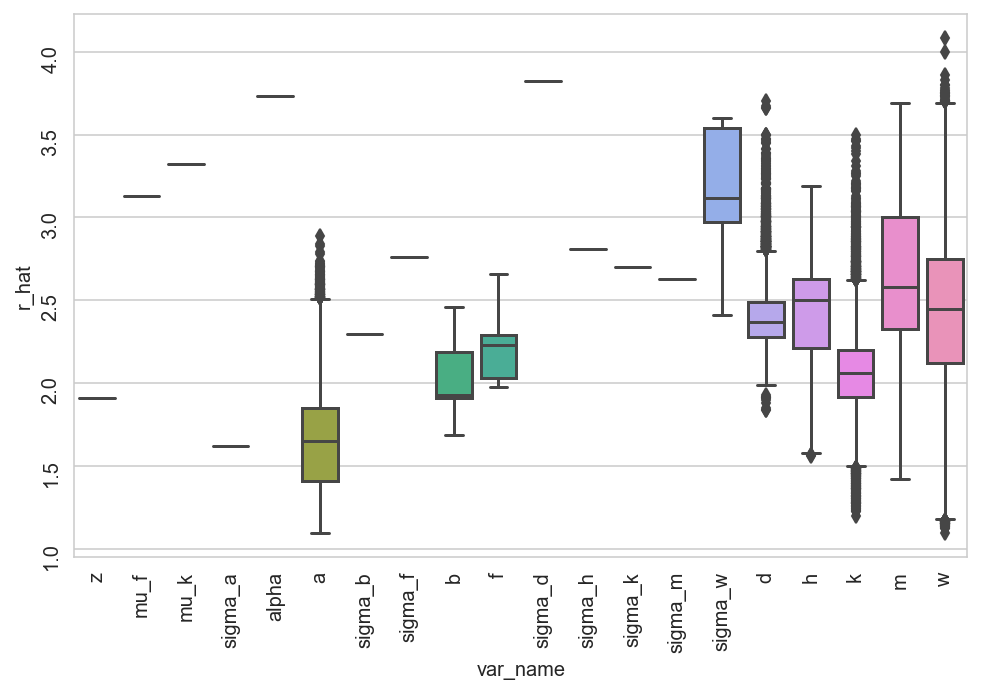

In [7]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=prostate_post_summary, x="var_name", y="r_hat", ax=ax)
ax.tick_params(rotation=90)
plt.show()

---

In [8]:
notebook_toc = time()
print(f"execution time: {(notebook_toc - notebook_tic) / 60:.2f} minutes")

execution time: 0.05 minutes


In [9]:
%load_ext watermark
%watermark -d -u -v -iv -b -h -m

Last updated: 2022-07-03

Python implementation: CPython
Python version       : 3.10.4
IPython version      : 8.4.0

Compiler    : Clang 12.0.1 
OS          : Darwin
Release     : 21.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit

Hostname: jhcookmac.harvardsecure.wireless.med.harvard.edu

Git branch: per-lineage

pandas    : 1.4.2
numpy     : 1.22.4
seaborn   : 0.11.2
matplotlib: 3.5.2

